# CPSC529: 03_Scikit_1_Basics

## 1. Iris Dataset

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

print('Data type', type(iris),'\n')
print('Data attributes: ', dir(iris),'\n')

Data type <class 'sklearn.utils._bunch.Bunch'> 

Data attributes:  ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names'] 



See more details on Scikit-Learn Data attributes [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

Here is the summary:

data: Bunch
Dictionary-like object, with the following attributes.

    - data{ndarray, dataframe} of shape (150, 4)
    The data matrix. If as_frame=True, data will be a pandas DataFrame.

    - target: {ndarray, Series} of shape (150,)
    The classification target. If as_frame=True, target will be a pandas Series.

    - feature_names: list
    The names of the dataset columns.

    - target_names: list
    The names of target classes.

    - frame: DataFrame of shape (150, 5)
    Only present when as_frame=True. DataFrame with data and target.

    New in version 0.23.

    - DESCR: str
    The full description of the dataset.

    - filename: str
    The path to the location of the data.

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
print(type(iris.data), iris.data.shape, iris.data_module)
print(iris.data[: 5])
#data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names'] 

<class 'numpy.ndarray'> (150, 4) sklearn.datasets.data
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [4]:
print(type(iris.feature_names), iris.filename)
print(iris.feature_names)

print(type(iris.target), iris.target.shape)
print(iris.target[: 5])

<class 'list'> iris.csv
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
<class 'numpy.ndarray'> (150,)
[0 0 0 0 0]


In [5]:
print(type(iris.target_names), iris.target_names)

<class 'numpy.ndarray'> ['setosa' 'versicolor' 'virginica']


In [6]:
print(iris.frame)

None


In [7]:
iris_frame = load_iris(as_frame=True)
print (type(iris_frame), dir(iris_frame), type(iris_frame.frame))
print(iris_frame.frame.shape, iris_frame.frame.columns)
print(iris_frame.frame.head())

<class 'sklearn.utils._bunch.Bunch'> ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names'] <class 'pandas.core.frame.DataFrame'>
(150, 5) Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


## 2. Supervised learning:

### 2.1 Training/test dataset

In [8]:
X_iris, y_iris=iris.data, iris.target
print (type(X_iris), X_iris.shape)
print (type(y_iris), y_iris.shape)

<class 'numpy.ndarray'> (150, 4)
<class 'numpy.ndarray'> (150,)


In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, 
                                                random_state=2)

### 2.2 Model selection, building, prediction

In [10]:
from sklearn.tree import DecisionTreeClassifier # 1. choose model class
model = DecisionTreeClassifier()                # 2. instantiate model
model.fit(Xtrain, ytrain)                       # 3. fit model to data
y_model = model.predict(Xtest)   

[Text(0.4, 0.9, 'x[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [34, 39, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'x[3] <= 1.65\ngini = 0.5\nsamples = 78\nvalue = [0, 39, 39]'),
 Text(0.2, 0.5, 'x[2] <= 4.95\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.3, 0.3, 'x[3] <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[2] <= 4.85\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

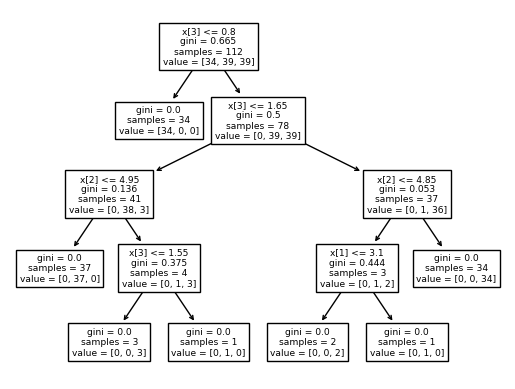

In [11]:
from sklearn import tree
tree.plot_tree(model)

### 2.3 Model Performance

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

### 2.4 Supervised learning: Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data
accuracy_score(ytest, y_model)             # 5. accuracy

In [ ]:
# naive bayes model parameters
print(model.classes_, model.class_prior_)
print(model.theta_)
print(model.var_)

## 3. Unsupervised Learning

### 3.1 Dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

Now let's plot the results. A quick way to do this is to insert the results into the original Iris ``DataFrame``, and use Seaborn's ``lmplot`` to show the results:

In [ ]:
import pandas as pd
X_2D= pd.DataFrame(X_2D, columns=['PCA1', 'PCA2'])
print (X_2D.columns)
X_2D.plot(x='PCA1', y='PCA2', kind='scatter')